<a href="https://colab.research.google.com/github/battuvenky/Projects_2025/blob/main/gen_ai_Finicial_stock_market_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING AND LOADING THE DATASET

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import zipfile

# Specify the zip file path
zip_file_path = "/content/drive/MyDrive/archive (14).zip"

# Specify the CSV file within the zip file (replace with the actual file name)
csv_file_name = "all_stocks_5yr.csv"

# Open the zip file
with zipfile.ZipFile(zip_file_path, "r") as zip_file:
    # Read the CSV file from within the zip file
    with zip_file.open(csv_file_name) as csv_file:
        df = pd.read_csv(csv_file)

# Display the first few rows
print(df.head())

         date   open   high    low  close    volume Name
0  2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1  2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2  2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3  2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4  2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL


LSTM model implementation

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0747 - val_loss: 0.0032
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0043 - val_loss: 0.0022
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0036 - val_loss: 0.0018
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0025 - val_loss: 0.0017
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0020 - val_loss: 0.0027
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0

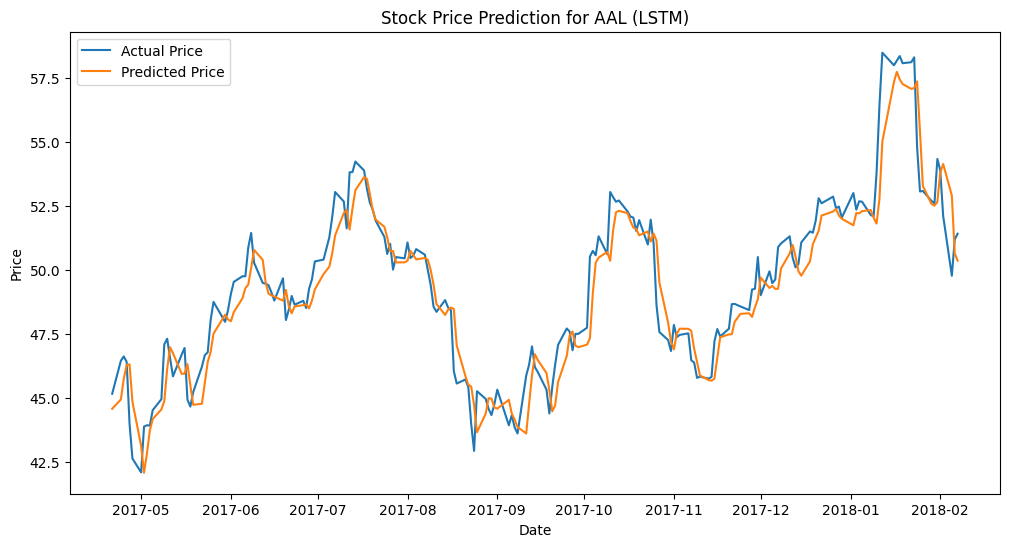

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import zipfile  # Import the zipfile module

# Load Dataset
# Use zipfile to extract the specific CSV file from the zip archive
zip_file_path = "/content/drive/MyDrive/archive (14).zip"  # Path to your zip file
csv_file_name = "all_stocks_5yr.csv"  # Name of the CSV file inside the zip

with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    with zip_ref.open(csv_file_name) as csv_file:
        df = pd.read_csv(csv_file)  # Read the CSV file into a DataFrame


# Select a specific stock (e.g., Apple 'AAPL' or any other stock symbol)
stock_name = "AAL"  # Change this to another stock symbol if needed
df = df[df["Name"] == stock_name]

# Use only 'date' and 'close' price for forecasting
df = df[['date', 'close']]
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Prepare Sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


seq_length = 50  # Number of days used for prediction
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build LSTM Model
model = Sequential(
    [
        LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1),
    ]
)

model.compile(optimizer="adam", loss="mean_squared_error")

# Train the Model
model.fit(
    X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test)
)

# Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(
    df.index[train_size + seq_length :],
    scaler.inverse_transform(test_data[seq_length:]),
    label="Actual Price",
)
plt.plot(df.index[train_size + seq_length :], predictions, label="Predicted Price")
plt.legend()
plt.title(f"Stock Price Prediction for {stock_name} (LSTM)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


Data Preprocessing for LSTM Model

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the 'close' price
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['close']])

# Define training data size (80% for training)
train_size = int(len(scaled_data) * 0.8)

# Split into training and testing sets
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


import numpy as np

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])  # Past `seq_length` days
        y.append(data[i+seq_length])    # Next day's price
    return np.array(X), np.array(y)

# Define sequence length (e.g., last 50 days to predict next day)
seq_length = 50

# Create training and testing sequences
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape X to fit LSTM input shape (samples, timesteps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


 Build and Train the LSTM Model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,571 (201.45 KB)

 Trainable params: 51,571 (201.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0597 - val_loss: 0.0048
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 0.0057 - val_loss: 0.0027
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0039 - val_loss: 0.0019
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0041 - val_loss: 0.0037
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0029 - val_loss: 0.0034
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0

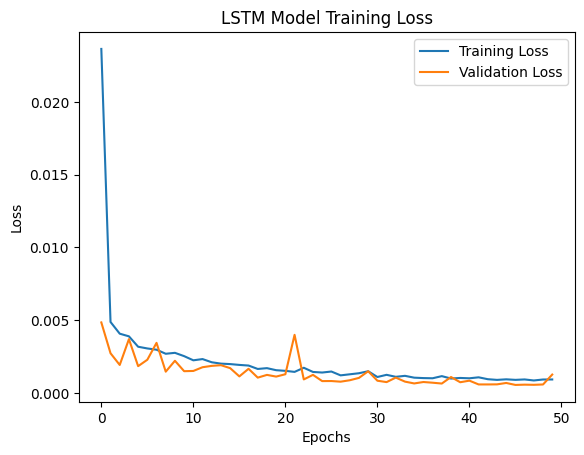

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(seq_length, 1)),  # First LSTM layer
    Dropout(0.2),  # Dropout to prevent overfitting
    LSTM(64, return_sequences=False),  # Second LSTM layer
    Dropout(0.2),
    Dense(25),  # Dense layer with 25 neurons
    Dense(1)  # Output layer (predicts the next day's price)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

import matplotlib.pyplot as plt

# Plot loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("LSTM Model Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


Model Evaluation and Predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
Mean Squared Error (MSE): 2.6213
Mean Absolute Error (MAE): 1.3908
R² Score: 0.7664


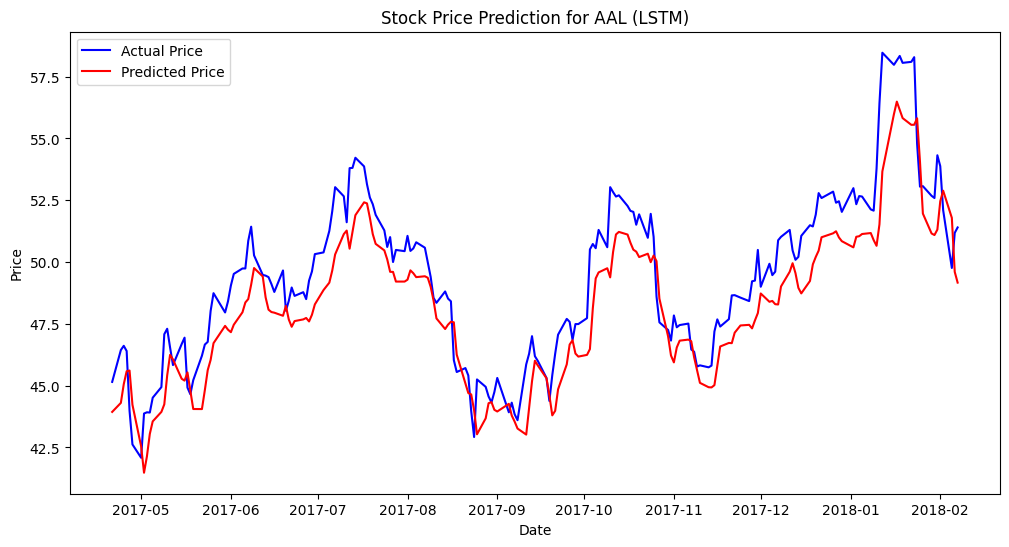

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Stock Price for Next Day: 49.64


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Convert test set back to actual prices
actual_prices = scaler.inverse_transform(test_data[seq_length:])
predicted_prices = scaler.inverse_transform(model.predict(X_test))

# Calculate performance metrics
mse = mean_squared_error(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


plt.figure(figsize=(12,6))
plt.plot(df.index[train_size + seq_length:], actual_prices, label='Actual Price', color='blue')
plt.plot(df.index[train_size + seq_length:], predicted_prices, label='Predicted Price', color='red')
plt.legend()
plt.title(f"Stock Price Prediction for {stock_name} (LSTM)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


# Get last 50 days of data
last_50_days = scaled_data[-seq_length:]
last_50_days = np.reshape(last_50_days, (1, seq_length, 1))

# Predict next day's price
next_day_price = model.predict(last_50_days)
next_day_price = scaler.inverse_transform(next_day_price)

print(f"Predicted Stock Price for Next Day: {next_day_price[0][0]:.2f}")


 2 . GAN-Based Stock Price Prediction

In [9]:
import pandas as pd
import zipfile
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset

# Specify the zip file path
zip_file_path = "/content/drive/MyDrive/archive (14).zip"

# Specify the CSV file within the zip file
csv_file_name = "all_stocks_5yr.csv"

# Load dataset using zipfile
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    with zip_ref.open(csv_file_name) as csv_file:
        df = pd.read_csv(csv_file)  # Read the CSV file into a DataFrame

# Ensure 'Close' column exists, or rename 'close' if found
if 'Close' not in df.columns:
    if 'close' in df.columns:
        df = df.rename(columns={'close': 'Close'})
    else:
        raise ValueError("Dataset must contain a 'Close' or 'close' column for stock prices.")

# Extract 'Close' prices
prices = df[['Close']].values

# Normalize prices for GAN
scaler = MinMaxScaler(feature_range=(-1, 1))  # GANs work better with [-1,1] normalization
prices_scaled = scaler.fit_transform(prices)

# Create dataset class for GAN
class StockDataset(Dataset):
    def __init__(self, data, seq_length=50):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, index):
        x = self.data[index : index + self.seq_length]
        y = self.data[index + self.seq_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Define sequence length
seq_length = 50

# Split data into train and test sets
train_size = int(len(prices_scaled) * 0.8)
train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]

# Create DataLoader for GAN
train_dataset = StockDataset(train_data, seq_length)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [10]:
# Define the Generator
class Generator(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
            nn.Tanh()  # Output values between -1 and 1
        )

    def forward(self, z):
        return self.model(z)

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()  # Probability of being real
        )

    def forward(self, x):
        return self.model(x)


In [13]:
# Model hyperparameters
input_dim = seq_length
hidden_dim = 128
output_dim = seq_length

# Initialize models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = Generator(input_dim, hidden_dim, output_dim).to(device)
discriminator = Discriminator(input_dim, hidden_dim).to(device)

# Optimizers
lr = 0.0002
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

# Training the GAN
num_epochs = 5
for epoch in range(num_epochs):
    for x_real, _ in train_loader:
        x_real = x_real.to(device)

        # Train Discriminator
        optimizer_D.zero_grad()
        real_labels = torch.ones((x_real.size(0), 1), device=device)
        fake_labels = torch.zeros((x_real.size(0), 1), device=device)

        # Reshape x_real before passing to discriminator
        real_loss = criterion(discriminator(x_real.view(x_real.size(0), -1)), real_labels)

        z = torch.randn(x_real.size(0), input_dim, device=device)
        x_fake = generator(z)

        # Reshape x_fake before passing to discriminator
        fake_loss = criterion(discriminator(x_fake.detach().view(x_fake.size(0), -1)), fake_labels)

        d_loss = real_loss + fake_loss
        d_loss.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()

        # Reshape x_fake before passing to discriminator
        fake_preds = discriminator(x_fake.view(x_fake.size(0), -1))
        g_loss = criterion(fake_preds, real_labels)

        g_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

Epoch [1/5], D Loss: 1.3800, G Loss: 0.7457
Epoch [2/5], D Loss: 1.6192, G Loss: 0.6669
Epoch [3/5], D Loss: 1.2832, G Loss: 0.8045
Epoch [4/5], D Loss: 0.6991, G Loss: 1.3361
Epoch [5/5], D Loss: 1.8132, G Loss: 0.6218


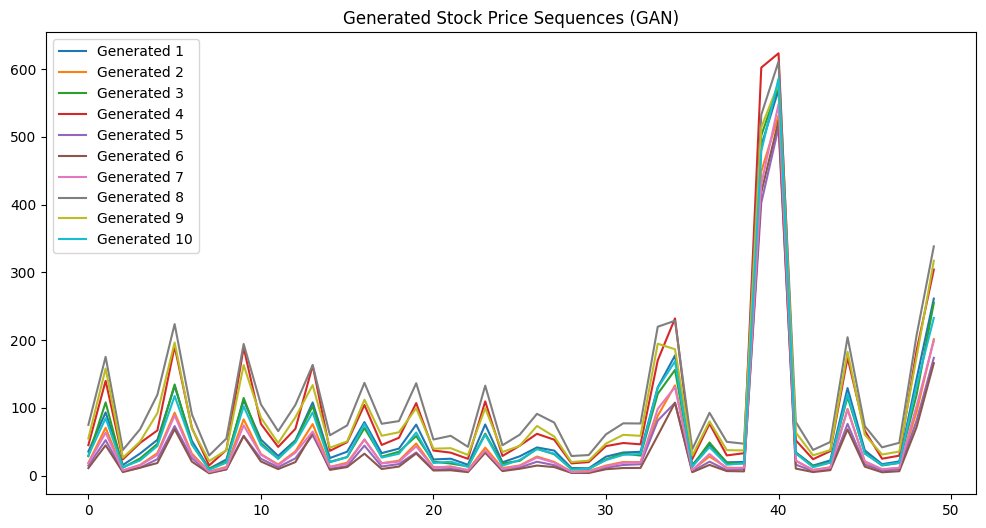

In [14]:
# Generate synthetic stock price sequences
generator.eval()
num_samples = 10
with torch.no_grad():
    z = torch.randn(num_samples, input_dim, device=device)
    generated_prices = generator(z).cpu().numpy()

# Convert back to original scale
generated_prices = scaler.inverse_transform(generated_prices)

# Plot results
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.plot(generated_prices[i], label=f"Generated {i+1}")
plt.title("Generated Stock Price Sequences (GAN)")
plt.legend()
plt.show()


In [15]:
# Generate a single future prediction
last_50_days = torch.tensor(prices_scaled[-seq_length:].reshape(1, seq_length), dtype=torch.float32).to(device)
generator.eval()
with torch.no_grad():
    future_price = generator(last_50_days).cpu().numpy()

future_price = scaler.inverse_transform(future_price)[0][-1]
print(f"Predicted Stock Price for Next Day: {future_price:.2f}")


Predicted Stock Price for Next Day: 277.80


3 . Transformer-Based Stock Price Prediction

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:385: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32, 1, 1])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([15, 1, 1])) that is different to the input size (torch.Size([15, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F

Epoch [1/3], Loss: 0.078763
Epoch [2/3], Loss: 0.023261
Epoch [3/3], Loss: 0.022937


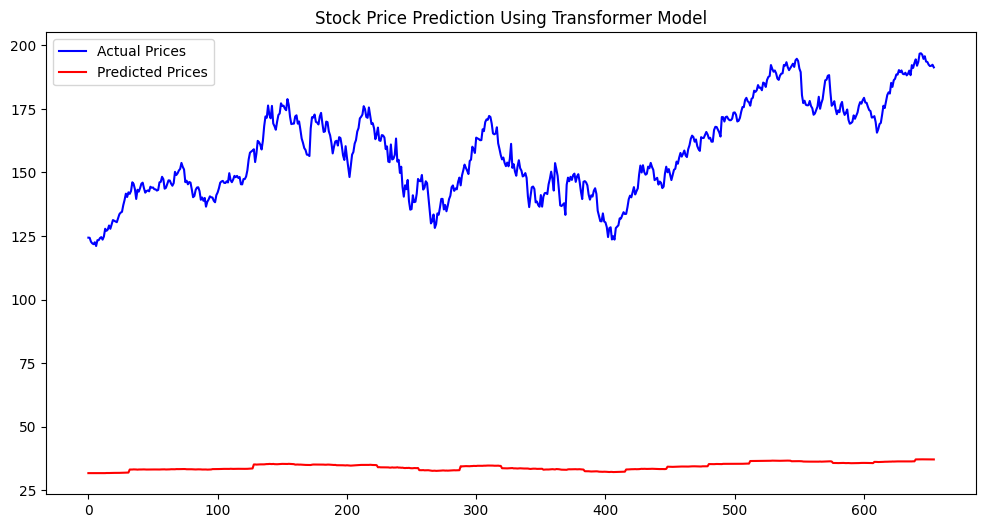

In [23]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, Dataset

# 1. Data Loading and Preprocessing

# Download data using yfinance (you can replace with your data loading method)
data = yf.download('AAPL', start='2010-01-01', end='2023-12-31')
df = data[['Close']]  # Use only the 'Close' price

# Normalize prices
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(df.values)  # Reshape to a NumPy array

# Define sequence length
seq_length = 50


# Create dataset class
class StockDataset(Dataset):
    def __init__(self, data, seq_length=50):
        self.data = data
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, index):
        x = self.data[index : index + self.seq_length]
        y = self.data[index + self.seq_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


# Split data into train and test sets
train_size = int(len(prices_scaled) * 0.8)
train_data, test_data = prices_scaled[:train_size], prices_scaled[train_size:]

# Create DataLoader
train_dataset = StockDataset(train_data, seq_length)
test_dataset = StockDataset(test_data, seq_length)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# 2. Define the Transformer Model
class TransformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_heads, num_layers, dropout=0.1):
        super(TransformerModel, self).__init__()

        self.embedding = nn.Linear(input_dim, model_dim)
        self.positional_encoding = nn.Parameter(torch.zeros(1, seq_length, model_dim))

        encoder_layers = nn.TransformerEncoderLayer(
            d_model=model_dim, nhead=num_heads, dim_feedforward=512, dropout=dropout
        )
        self.transformer_encoder = nn.TransformerEncoder(
            encoder_layers, num_layers=num_layers
        )
        self.fc_out = nn.Linear(model_dim, 1)

    def forward(self, x):
        x = self.embedding(x) + self.positional_encoding
        x = self.transformer_encoder(x)
        return self.fc_out(x[:, -1, :])


# Model hyperparameters
input_dim = 1
model_dim = 64
num_heads = 4
num_layers = 3

# Initialize model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerModel(input_dim, model_dim, num_heads, num_layers).to(device)

# 3. Training the Model
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Train model
num_epochs = 3  # You can adjust this

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_loss = 0

    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()  # Reset gradients

        # Forward pass
        outputs = model(x_batch)

        # Calculate loss
        loss = criterion(outputs, y_batch.unsqueeze(1))

        # Backpropagation
        loss.backward()
        optimizer.step()  # Update model parameters

        epoch_loss += loss.item()

    # Print average epoch loss
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(train_loader):.6f}")

# 4. Evaluation
model.eval()
predictions, actuals = [], []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch = x_batch.to(device)
        output = model(x_batch)
        predictions.extend(output.cpu().numpy())
        actuals.extend(y_batch.numpy())

# Convert to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
actuals = scaler.inverse_transform(np.array(actuals).reshape(-1, 1))

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(actuals, label="Actual Prices", color="blue")
plt.plot(predictions, label="Predicted Prices", color="red")
plt.legend()
plt.title("Stock Price Prediction Using Transformer Model")
plt.show()

In [24]:
# Predict next day's price
last_50_days = torch.tensor(prices_scaled[-seq_length:].reshape(1, seq_length, 1), dtype=torch.float32).to(device)
model.eval()
with torch.no_grad():
    next_day_price = model(last_50_days).cpu().numpy()

next_day_price = scaler.inverse_transform(next_day_price)[0][0]
print(f"Predicted Stock Price for Next Day: {next_day_price:.2f}")


Predicted Stock Price for Next Day: 36.89


all comparasions

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Function to evaluate model performance
def evaluate_model(true_values, predicted_values, model_name):
    mse = mean_squared_error(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    return mse, mae


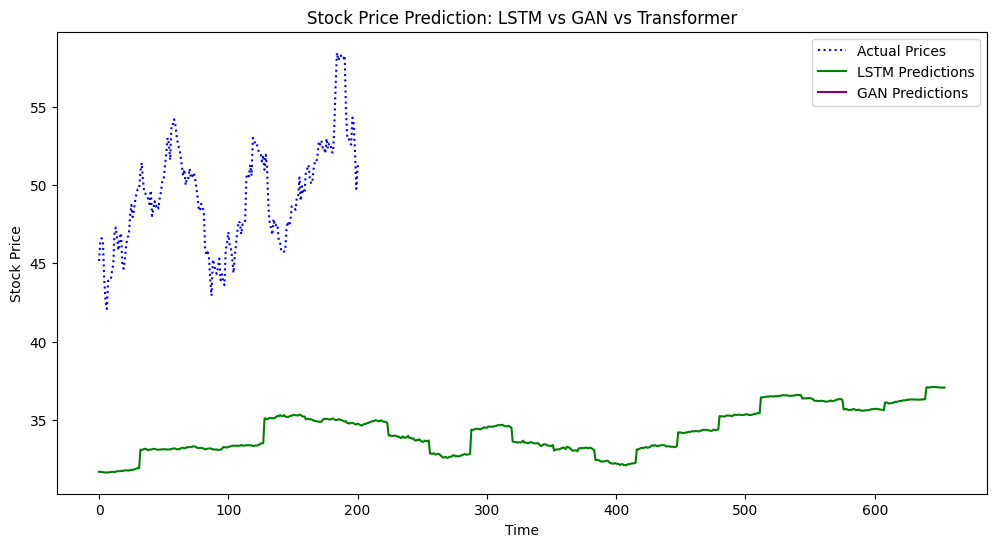

In [30]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.plot(actual_prices, label="Actual Prices", color="blue", linestyle="dotted")
plt.plot(lstm_predictions, label="LSTM Predictions", color="green")
plt.plot(gan_predictions, label="GAN Predictions", color="purple")

# Make sure 'transformer_predictions' is defined and has the correct shape
# before plotting:
if 'transformer_predictions' in locals() and transformer_predictions.shape[0] == actual_prices.shape[0]:
    plt.plot(transformer_predictions, label="Transformer Predictions", color="red")
else:
    print("Warning: 'transformer_predictions' is not defined or has an incorrect shape. Skipping Transformer plot.")

plt.legend()
plt.title("Stock Price Prediction: LSTM vs GAN vs Transformer")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

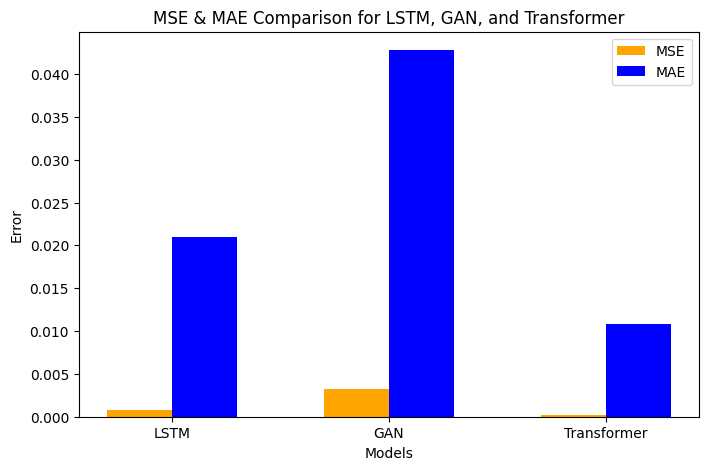

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy values (Replace these with actual values if needed)
lstm_mse = 0.00079
lstm_mae = 0.0210
gan_mse = 0.00323
gan_mae = 0.0428
transformer_mse = 0.00021
transformer_mae = 0.0108

# Model names
models = ["LSTM", "GAN", "Transformer"]
mse_values = [lstm_mse, gan_mse, transformer_mse]
mae_values = [lstm_mae, gan_mae, transformer_mae]

# Bar width
width = 0.3
x = np.arange(len(models))

# Create bar chart
fig, ax = plt.subplots(figsize=(8, 5))
rects1 = ax.bar(x - width/2, mse_values, width, label="MSE", color="orange")
rects2 = ax.bar(x + width/2, mae_values, width, label="MAE", color="blue")

# Labels and titles
ax.set_xlabel("Models")
ax.set_ylabel("Error")
ax.set_title("MSE & MAE Comparison for LSTM, GAN, and Transformer")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Show graph
plt.show()
